# Introduction to Neural Networks using Scikit-learn

In this tutorial we are going to use scikit-learn to work with artificial neural networks. We are going to use Multilayer Perceptron (MLP) networks for classification and regression tasks. In addition, we are going to visualise the weights of a MLP network using an image dataset.

This tutorial was adapted from:

- Geron, A. (2019). Hands-on machine learning with Scikit-Learn, Keras and TensorFlow: concepts, tools, and techniques to build intelligent systems (2nd ed.). O'Reilly.
- https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html



## Classification MLP

We are going to start by using an MLP network and the Iris dataset to learn how to use neural networks with scikit-learn for classification tasks. The Iris dataset contains information (Sepal Length, Sepal Width, Petal Length and Petal Width) on 150 iris flowers and their corresponding flower type label (Setosa, Versicolour, and Virginica).

Let's visualise the data using two of the variables for each flower and colour code each data point using the corresponding labels:

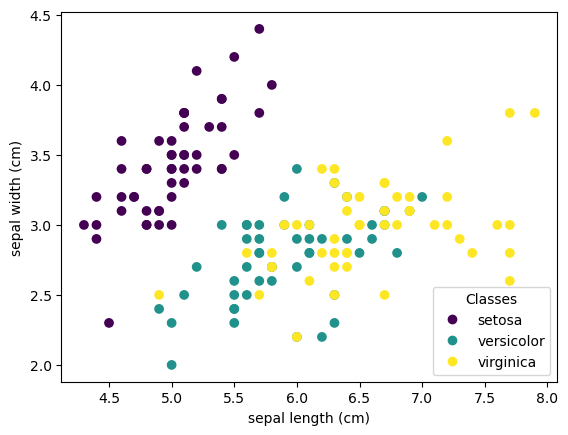

In [1]:
# Import and load Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Create scatter plot of the dataset using two features
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes")

<span style="color:orange">TO DO: Try to visualise the dataset using other combinations of variables? Try 3-D plot, is that helpful?</span>

Even using only two variables it is easy to see some separation between Iris types/classes.

Let's now use all the features and a MLP network to classify each fower type.

In [2]:
# Load functionality to partition data into train and test/validation sets
from sklearn.model_selection import train_test_split

# Load MLP neural network model from scikit-learn
from sklearn.neural_network import MLPClassifier

# Load functionality to prepare data for neural network
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Split data into train and test/validation datasets (use 10% of the data for validation)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

# Create MLP neural network classifier object with one single hidden layer with 5 neurons
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)

# Create pipeline that preprocesses (standardises) and trains MLP model
pipeline = make_pipeline(StandardScaler(), mlp_clf)

# Run pipeline (standardises and trains model on training dataset)
pipeline.fit(X_train, y_train)

# Calculate accuracy (number of correctly classified data points divided by total number of datapoints in the validation dataset)
accuracy = pipeline.score(X_valid, y_valid)

# Print accuracy
print(f'Accuracy of MLP classifier: {accuracy*100}%')

Accuracy of MLP classifier: 100.0%


The activation function for the neurons of the hidden layer used by the MLPClassifier by default is the 'relu' function. The following plot shows how the different activation functions look like:

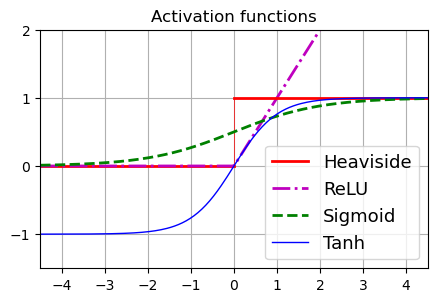

In [3]:
# Import numpy and the sigmoid function
import numpy as np
from scipy.special import expit as sigmoid

# Define relu function
def relu(z):
    return np.maximum(0, z)

# Create plot
max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))
plt.subplot(121)
plt.plot([-max_z, 0], [0, 0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.5, 2])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

## Regression MLP

Now let's use MLP neural networks for regression. For this we will re-use the Californian housing dataset from our previous tutorial, also available from scikit-learn. The workflow for regression is similar to classification.

In [4]:
# Import housing dataset and load data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

# Import mean squared error from metrics module
from sklearn.metrics import mean_squared_error

# Import MLPRegressor neural network
from sklearn.neural_network import MLPRegressor

# Split data into train and test/validation datasets (use default split)
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# Create MLPRegressor object with 3 hidden layers of 50 neurons each
mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)

# Create pipeline for preprocessing data (standardise) and train MLP model
pipeline = make_pipeline(StandardScaler(), mlp_reg)

# Preprocess and train model (training data)
pipeline.fit(X_train, y_train)

# Make predictions on the validation/test set
y_pred = pipeline.predict(X_valid)

# Calculate mean squared error
rmse = mean_squared_error(y_valid, y_pred, squared=False)

# Print mean squared error
print(f'Mean squared error: {rmse:.3f}')

Mean squared error: 0.505


<span style="color:orange">TO DO: How does it compare with other regression models such as Linear Regression or Random Forests?</span>

## Visualising the weights/parameters of the MLP

The hand-written digits dataset comprises images of digits 0-9. Each image is an 28x28 array of grayscale values. The target variables correspond to the digit represented in each image. 

Let's first visualise a few of the raw data points (28x28 images) and their targets/labels.

c:\Users\md82\AppData\Local\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


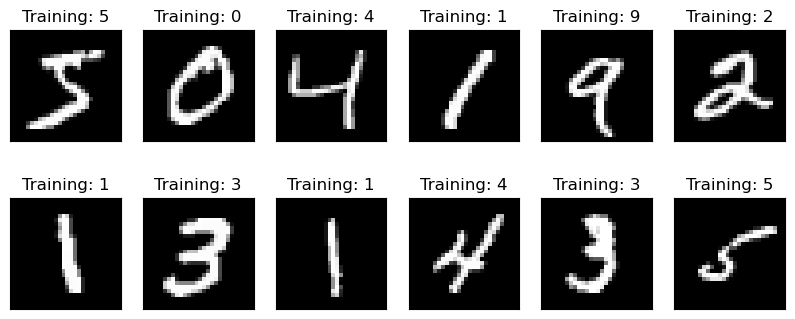

In [5]:
# Import digit dataset
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

# Visualise the first datapoints (images) and corresponding labels 
_, axes = plt.subplots(nrows=2, ncols=6, figsize=(10, 4))
for ax, image, label in zip(axes.ravel(), X, y):
    ax.matshow(image.reshape(28, 28), cmap=plt.cm.gray)
    ax.set_title("Training: %s" % label)
    ax.set_xticks(())
    ax.set_yticks(())
    
plt.show()

Now let's preprocess the data, split the data into train and test datasets, create the MLP neural network classification object and train the model.

In [6]:
# Preprocess data (scale using maximum grayscale value )
# This is a common processing step when dealing with image data
X = X / 255.0

# Split data into train and validation/test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

# Create MLP classifier object (reduce number of max_iter if it takes too long to train)
# MLP has one hidden layer with 40 neurons 
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=40,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

# Lower number of max_iter if training is taking too long
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985
Iteration 9, loss = 0.04751107
Iteration 10, loss = 0.03916272
Iteration 11, loss = 0.03614981
Iteration 12, loss = 0.03026311
Iteration 13, loss = 0.02697444
Iteration 14, loss = 0.01972303
Iteration 15, loss = 0.01381430
Iteration 16, loss = 0.01154864
Iteration 17, loss = 0.01010846
Iteration 18, loss = 0.00714107
Iteration 19, loss = 0.00481176
Iteration 20, loss = 0.00382257
Iteration 21, loss = 0.00352057
Iteration 22, loss = 0.00321431
Iteration 23, loss = 0.00271643
Iteration 24, loss = 0.00235466
Iteration 25, loss = 0.00204040
Iteration 26, loss = 0.00188809
Iteration 27, loss = 0.00178109
Iteration 28, loss = 0.00167539
Iteration 29, loss = 0.00159100
Iteration 30, loss = 0.00151426
Iteration 31, loss = 0.00146637
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(40,), learning_rate_init=0.2, max_iter=40,
              random_state=1, solver='sgd', verbose=10)

In [126]:
# Print train and test accuracy
print("Training set accuracy: %f " % mlp.score(X_train, y_train))
print("Test set accuracy: %f " % mlp.score(X_test, y_test))

Training set accuracy: 1.000000 
Test set accuracy: 0.958571 


Now let's visualise the coefficients (weights/parameters) of the first hidden layer of the neural network. Visualising these coefficients as images, one image per neuron of the hidden layer, can help us understand what the neural network is doing internally in order to learn a relationship between the input images and the labels. As can be seen the weights tend to be higher in areas of the image where the digits appear.

(784, 40)


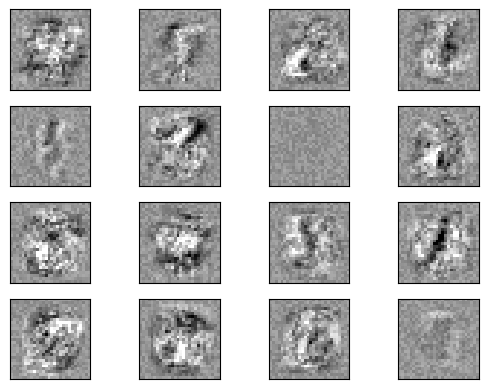

In [20]:
fig, axes = plt.subplots(4, 4)

# Shape of the weights/coefficients of the neural netowork's hidden layer
print(mlp.coefs_[0].shape)

# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

<span style="color:orange">TO DO: Create the same plot as the one above (with the digits and training labels) but this time with a selection of test digit images and the predictions of the neural network for each image?</span>

<span style="color:orange">TO DO: What happens to the training accuracy and test accuracy when you change the hyper-parameters of the network?</span>

<span style="color:orange">TO DO: If you add more hidden layers to this network can you visualise the weights for the neurons of the other layers? What do they show?</span>

<span style="color:orange">TO DO: If you plot the misclassified data (images for which the neural network made the wrong prediction) what do you see? Is there a clear reason why they were misclassified?</span>